In [25]:
import os
import pandas as pd # ku knižnici pandas budeme pristupovať pomocou aliasu pd
import matplotlib.pyplot as plt
import numpy as np # ku knižnici numpy budeme pristupovať pomocou aliasu np
import math 
import seaborn as sns # ku knižnici seaborn budeme pristupovať pomocou aliasu sns

In [26]:
os.chdir("C:\\Users\\NTB\\Desktop")
df = pd.read_csv("Customers.csv",sep=";")

In [27]:
df.head()


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


Vypísané niektoré údaje z datasetu. 

In [28]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Funkcia knižnice Matplotlib, ktorá vypíše dostupné štýly grafov. 

In [29]:
def age_and_work_experience():
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.bar(df["Age"],          #xlabel - Age
        df["Work Experience"]) #ylabel - Work Experience

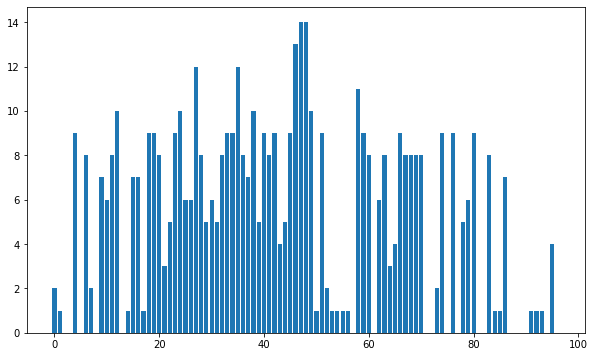

In [30]:
age_and_work_experience()

Graf knižnice Matplotlib v predovlenom nastavení. 

In [32]:
def age_and_work_experience_edge_color():
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.rcParams['font.size'] = 25
    

    ax.bar(df["Age"],          
        df["Work Experience"],
         color = 'cyan', edgecolor = 'darkblue' ) 
    
    ax.set(title = "Pracovné skúsenosti v závislosti od veku",
       xlabel = "Vek",
       ylabel = "Pracovné skúsenosti")



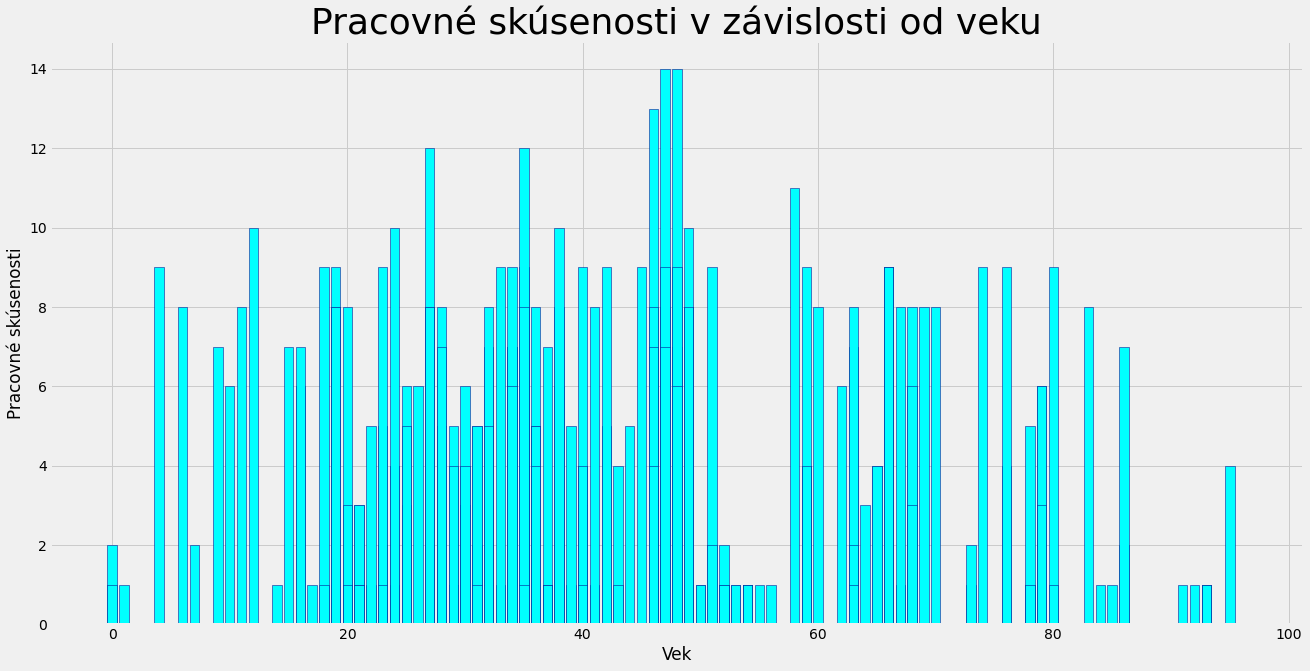

In [33]:
with plt.style.context('fivethirtyeight'):      
    age_and_work_experience_edge_color()

Nastavenie obrysovej farby pre stĺpec a farby výplne a použitie predvolenej témy.

In [34]:
def customer_():
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(df["CustomerID"],df["Spending Score (1-100)"], marker=",",
    c = df["Family Size"],
        cmap = 'YlGnBu')


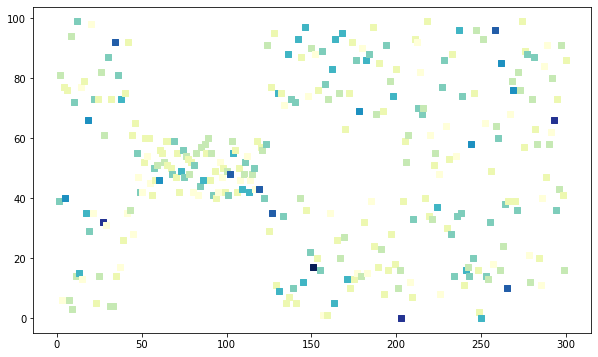

In [35]:
customer_()

Bodový graf knižnice Matplotlib zobrazujúci zákazníkov a ich skóre v obchode. Nastavenie bodu na pixel a zmena farebnej škály bodov.

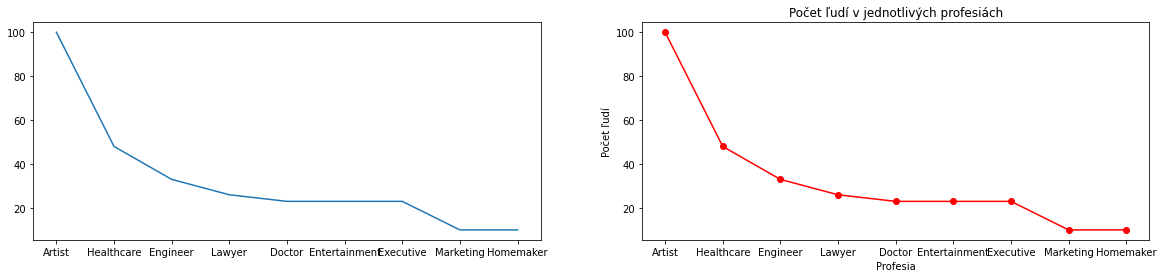

In [36]:
def profession_compare():
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20, 4))
    ax1.plot(df["Profession"].value_counts())
    
    ax2.plot(df["Profession"].value_counts(), color ="red" ,marker="o")

    ax2.set(title = "Počet ľudí v jednotlivých profesiách",
       xlabel = "Profesia",
       ylabel = "Počet ľudí")
    
profession_compare()



Čiarový graf zobrazujúci počet zákazníkov v jednotlivých profesiách v predvolenom nastavení a čiarový graf s malými úpravami (nadpis, názvy osí , zmena farby a pridanie označenia jednotlivých bodov). 

In [37]:
plt.gcf().canvas.get_supported_filetypes_grouped()

{'Encapsulated Postscript': ['eps'],
 'Joint Photographic Experts Group': ['jpeg', 'jpg'],
 'Portable Document Format': ['pdf'],
 'PGF code for LaTeX': ['pgf'],
 'Portable Network Graphics': ['png'],
 'Postscript': ['ps'],
 'Raw RGBA bitmap': ['raw', 'rgba'],
 'Scalable Vector Graphics': ['svg', 'svgz'],
 'Tagged Image File Format': ['tif', 'tiff']}

<Figure size 432x288 with 0 Axes>

Funkcia, ktorá pre knižnicu Matplotlib vypíše podporované formáty uloženia. 

count    300.000000
mean      43.176667
std       20.868407
min        0.000000
25%       28.750000
50%       39.000000
75%       56.250000
max       96.000000
Name: Age, dtype: float64

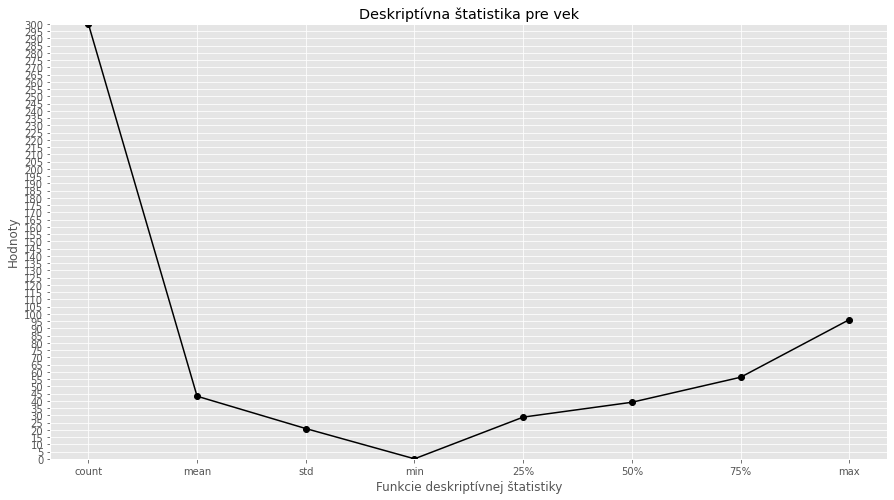

In [40]:
def descriptive():
    fig, ax = plt.subplots(figsize=(15, 8))
    y = df["Age"].describe()
    ax.plot(y,color ="black" ,marker="o")

    ax.set(title = "Deskriptívna štatistika pre vek",
       xlabel = "Funkcie deskriptívnej štatistiky",
       ylabel = "Hodnoty")
    
    plt.ylim((0,105))                               
    plt.yticks(np.arange(min(y), max(y)+1, 5))      
    
with plt.style.context('ggplot'):
 descriptive()

df["Age"].describe()

Čiarový graf zobrazujúci jednotlivé funkcie deskriptívnej štatistiky a ich hodnoty. 

In [41]:
SpendigScore_Gender_SortProfession_pivot = pd.pivot_table(df, columns = ["Profession"], 
    index = ["Gender"], 
    values = ["Spending Score (1-100)"], 
    aggfunc = np.sum ,
    margins=True)

pivot = pd.pivot_table(df, columns = ["Profession"], index = ["Gender"], values = ["Spending Score (1-100)"], aggfunc = np.sum)

SpendigScore_Gender_SortProfession_pivot


Spending Score (1-100)                                          \
Profession                 Artist Doctor Engineer Entertainment Executive   
Gender                                                                      
Female                       3398    781      680           839       546   
Male                         1908    440      532           498       409   
All                          5306   1221     1212          1337       955   

                                                         
Profession Healthcare Homemaker Lawyer Marketing    All  
Gender                                                   
Female           1217       190    763       422   8836  
Male             1210       297    540       241   6075  
All              2427       487   1303       663  14911

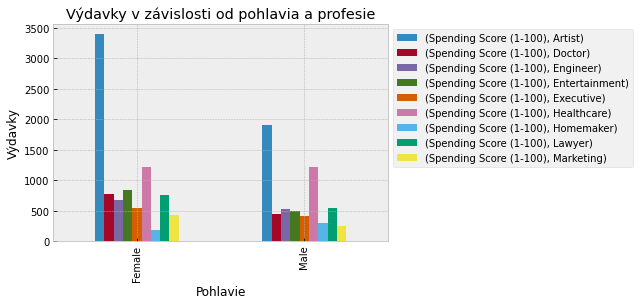

In [44]:
def pivot_plot():
    ax = pivot.plot(
     kind='bar', stacked=False,
     title= 'Výdavky v závislosti od pohlavia a profesie'
  )
    
    ax.set(xlabel='Pohlavie', ylabel='Výdavky')
    ax.legend(title='Profesia')

    ax.legend(bbox_to_anchor=(1, 1))

with plt.style.context('bmh'):
 pivot_plot()


Zoskupený stĺpcový graf podľa pohlavia zobrazujúci údaje kontingenčnej tabuľky. (Skóre podľa profesií).

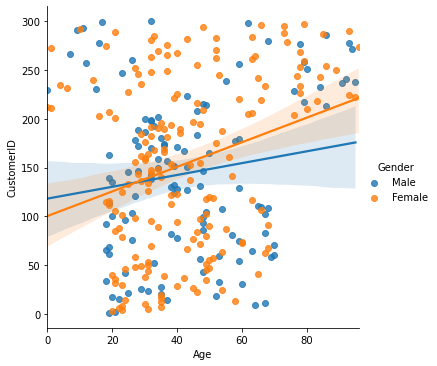

In [45]:
sns.lmplot(x = 'Age', y = 'CustomerID', data = df, hue = 'Gender')

Príklad regresného grafu knižnice Seaborn zobrazujúci Vek zákazníkov rozdelený podľa pohlavia. 

In [46]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': (1, 1, 1, 0),
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'projecting',
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False,
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

Funkcia knižnice Seaborn, ktorá vypíše dostupné úpravy pre os x a y. 

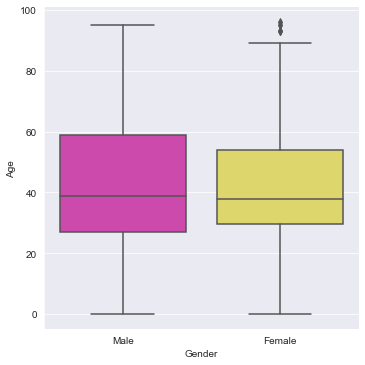

In [47]:
sns.set_style('darkgrid')
sns.set_palette(['#e034b8', '#f0e659'])
sns.catplot(x="Gender", y="Age",  data=df, kind="box");

Krabicový graf knižnice Seaborn zobrazujúci rozdelenie premennej vek v jednotlivých pohlaviach. Nastavenie vlastnej farby. 

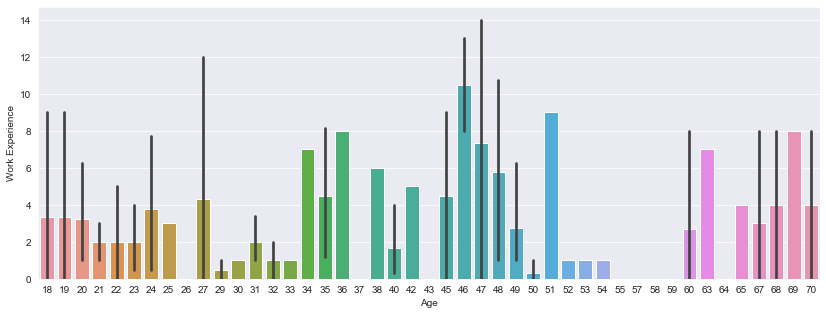

In [85]:
plt.figure(figsize=(14, 5))
sns.barplot(data=df,
            x="Age",                   #xlabel - Age 
            y="Work Experience")       #ylabel - Work Experience
plt.show()

Stĺpcový graf knižnice Seaborn v predvolenom nastavení. 

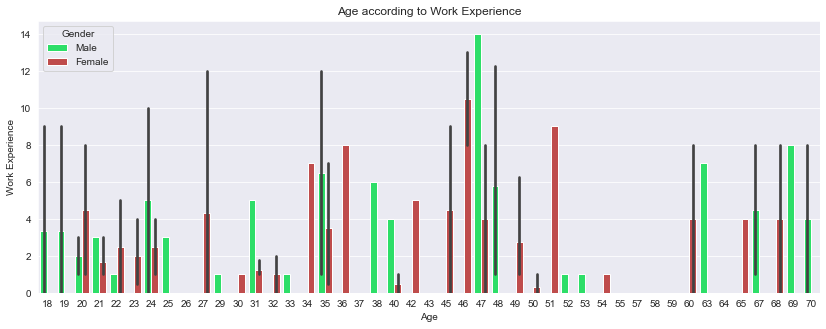

In [86]:
sns.set_palette(['#0ffc5e', '#d23939'])
plt.figure(figsize=(14, 5))
sns.barplot(data=df,
            x="Age",                   #xlabel - Age 
            y="Work Experience",       #ylabel - Work Experience
           hue="Gender",               #group- Gender
           ).set(title='Age according to Work Experience')     
plt.show()

Stĺpcový graf knižnice Seaborn zobrazujúci Vek zákazníkov podľa rokov praxe rozdelený podľa pohlavia. S úpravami: názov, názvy osí, zmena farby. 

count    100.000000
mean      39.750000
std       15.626561
min       18.000000
25%       24.750000
50%       36.500000
75%       50.250000
max       70.000000
Name: Age, dtype: float64

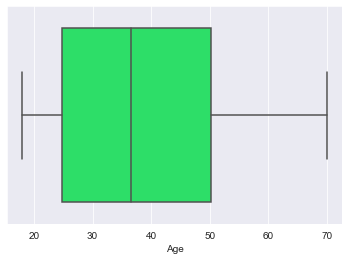

In [87]:
sns.boxplot(x="Age",data=df)
df["Age"].describe()

Krabicový graf zobrazujúci súhrn údajov pre premennú vek v predvolenom nastavení.

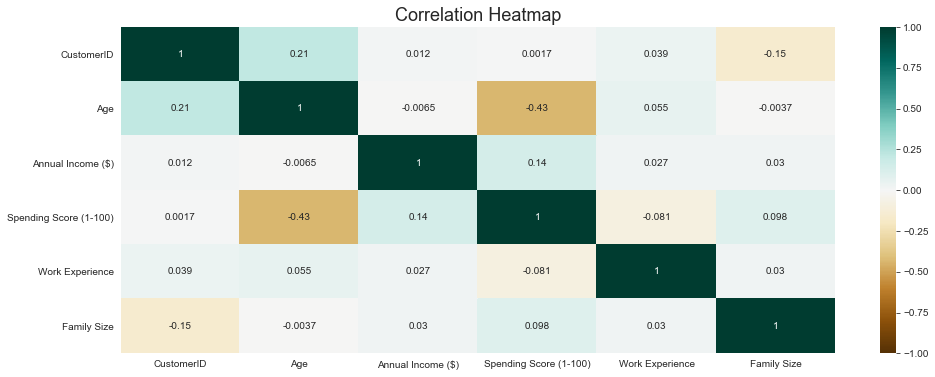

In [88]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18});

Graf knižnice Seaborn typu tepelná mapa zobrazujúci vťah medzi jednotlivými premennými. (Korelačná mapa)